### 幾何学的変換
#### 線形変換
* 拡大・縮小(scaling)
* 回転(rotation)
* 鏡映(reflection)
* スキュー(skewing)

#### 線形で表せない変換
* アフィン変換  
　任意の線形変換と平行移動を組み合わせた変換。  
  アフィン変換では、原図形の長さや角度は保たれないが、線分の直線性や平行性は保たれる。
 * ユークリッド変換  
  アフィン変換の特殊な例。任意の回転と平行移動の組み合わせ。  
  対象が大きさや形を保ったまま任意に移動するような変換 
 * 相似変換
* 射影変換

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def resize(img, rate=0.5):
    #height, width = img.shape[:2]
    #cv2.resize(image,(width, height) )
    resize = cv2.resize(img,(int(img.shape[1]*rate),int(img.shape[0]*rate)))
    return resize


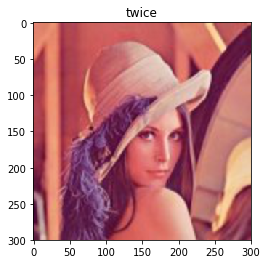

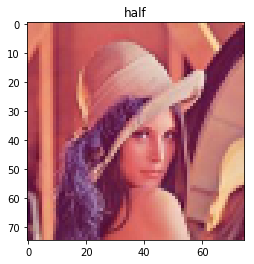

In [4]:
img = cv2.imread('./images/Lenna.jpg')
a = resize(img, rate=2)
a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)

b = resize(img, rate=0.5)
b = cv2.cvtColor(b, cv2.COLOR_BGR2RGB)

plt.imshow(a),plt.title('twice')
plt.show()

plt.imshow(b),plt.title('half')
plt.show()


In [49]:
#rotation 議題テーマ　rotationは有効か？
def rotation(img, theta=15):
    rows,cols = img.shape[:2]
    M = cv2.getRotationMatrix2D((cols/2,rows/2),theta,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    return dst


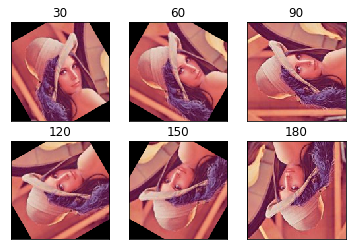

In [55]:
img = cv2.imread('./images/Lenna.jpg')
a = rotation(img, theta=30)
a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)

b = rotation(img, theta=60)
b = cv2.cvtColor(b, cv2.COLOR_BGR2RGB)

c = rotation(img, theta=90)
c = cv2.cvtColor(c, cv2.COLOR_BGR2RGB)

d = rotation(img, theta=120)
d = cv2.cvtColor(d, cv2.COLOR_BGR2RGB)

e = rotation(img, theta=150)
e = cv2.cvtColor(e, cv2.COLOR_BGR2RGB)

f = rotation(img, theta=180)
f = cv2.cvtColor(f, cv2.COLOR_BGR2RGB)


plt.subplot(231),plt.imshow(a),plt.title('30')
plt.xticks([]),plt.yticks([])
plt.subplot(232),plt.imshow(b),plt.title('60')
plt.xticks([]),plt.yticks([])
plt.subplot(233),plt.imshow(c),plt.title('90')
plt.xticks([]),plt.yticks([])
plt.subplot(234),plt.imshow(d),plt.title('120')
plt.xticks([]),plt.yticks([])
plt.subplot(235),plt.imshow(e),plt.title('150')
plt.xticks([]),plt.yticks([])
plt.subplot(236),plt.imshow(f),plt.title('180')
plt.xticks([]),plt.yticks([])


plt.show()

In [6]:
#鏡像に近いものflip
def flip(img, mode='all'):
    if mode == 'lr':
        #flipcode > 0 --> y axis flip
        return cv2.flip(img, 1)
    if mode == 'ud':
        #flipcode = 0 --> x axis flip
        return cv2.flip(img, 0)
    if mode == 'all':
        #flipcode < 0 --> x axis flip and y axis flip
        return cv2.flip(img, -1)

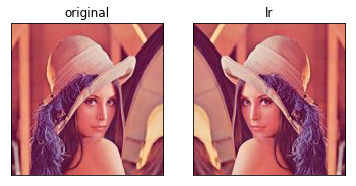

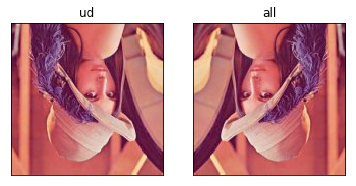

In [7]:
img = cv2.imread('./images/Lenna.jpg')
a = flip(img, 'lr')
a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)

b = flip(img, 'ud')
b = cv2.cvtColor(b, cv2.COLOR_BGR2RGB)

c = flip(img, 'all')
c = cv2.cvtColor(c, cv2.COLOR_BGR2RGB)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.subplot(121),plt.imshow(img),plt.title('original')
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(a),plt.title('lr')
plt.xticks([]),plt.yticks([])
plt.show()
plt.subplot(121),plt.imshow(b),plt.title('ud')
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(c),plt.title('all')
plt.xticks([]),plt.yticks([])
plt.show()

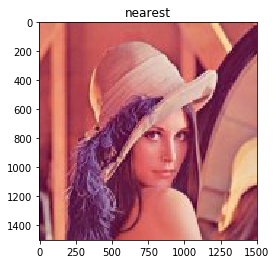

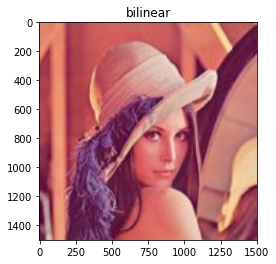

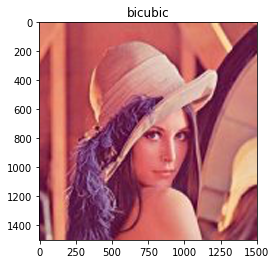

In [81]:
#http://imagingsolution.blog107.fc2.com/blog-entry-142.html
img = cv2.imread('./images/Lenna.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

nearest = cv2.resize(img, (img.shape[1]*10, img.shape[0]*10), interpolation=cv2.INTER_NEAREST)
bilinear = cv2.resize(img, (img.shape[1]*10, img.shape[0]*10), interpolation=cv2.INTER_LINEAR)
bicubic = cv2.resize(img, (img.shape[1]*10, img.shape[0]*10), interpolation=cv2.INTER_CUBIC)

plt.imshow(nearest)
plt.title('nearest')
plt.show()

plt.imshow(bilinear)
plt.title('bilinear')
plt.show()

plt.imshow(bicubic)
plt.title('bicubic')
plt.show()
